In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Проанализируем датасет фильмов с IMDB.

In [2]:
df=pd.read_csv('tmdb_5000_movies.csv')

Разобьем дату релиза на две колонки: год и месяц. А также уберем две выбивающиеся точки.

In [3]:
df['year']=df['release_date'].str.slice(0,4).astype(float)
df['month']=df['release_date'].str.slice(5,7).astype(float)
df=df.drop([4255,2638], axis=0)
df=df.reindex(range(0,len(df)))

In [4]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,2009.0,12.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 22 columns):
budget                  4799 non-null float64
genres                  4799 non-null object
homepage                1710 non-null object
id                      4799 non-null float64
keywords                4799 non-null object
original_language       4799 non-null object
original_title          4799 non-null object
overview                4796 non-null object
popularity              4799 non-null float64
production_companies    4799 non-null object
production_countries    4799 non-null object
release_date            4798 non-null object
revenue                 4799 non-null float64
runtime                 4797 non-null float64
spoken_languages        4799 non-null object
status                  4799 non-null object
tagline                 3956 non-null object
title                   4799 non-null object
vote_average            4799 non-null float64
vote_count              4799 non

Сначала посмотрим попарное сравнение всех количественных признаков.

- Есть явная зависимость бюджета от года релиза: сейчас выделяется на фильмы больше денег, чем раньше.
- Суперпопулярные фильмы выходили в последние 5 лет.
- Со временем стали снимать чаще плохие фильмы.
- Есть некоторая зависимость оценки зрителей от бюджета.

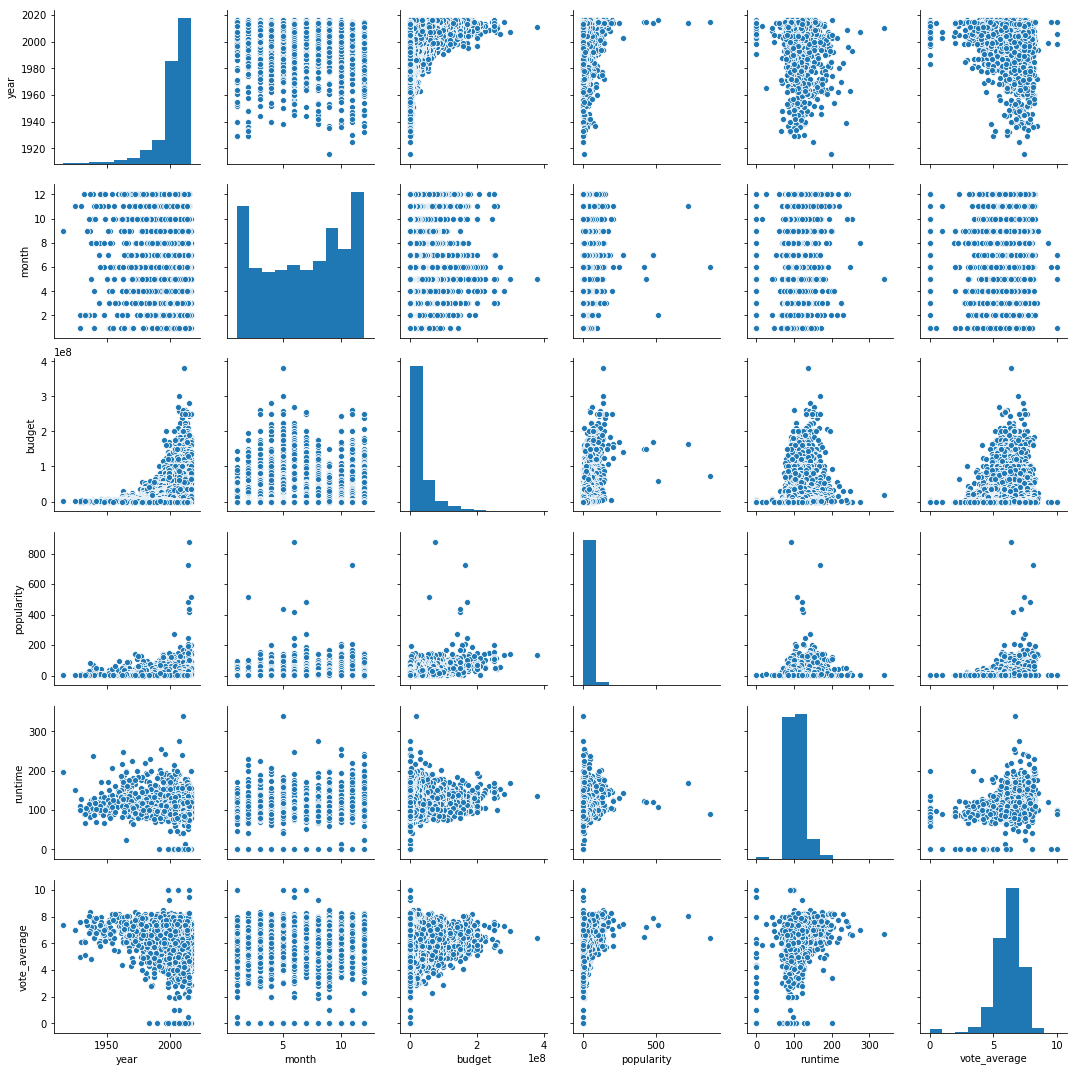

In [18]:
sns.pairplot(df[['year','month','budget','popularity','runtime','vote_average']])
plt.show()

Посмотрим внимательнее на изменение параметров со временем.

In [7]:
df_year=df.groupby('year').mean()[['budget','popularity','runtime','vote_average']]

- В среднем, бюджет фильмов рос, в то время как средняя оценка пользователей падала.

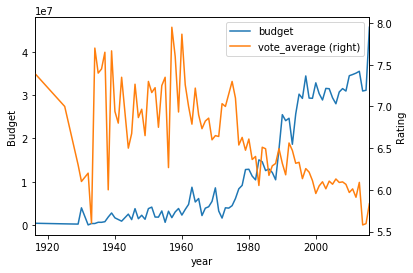

In [8]:
ax=df_year[['budget','vote_average']].plot(secondary_y='vote_average')
ax.set_ylabel('Budget')
ax.right_ax.set_ylabel('Rating')
plt.show()

- Длительность фильмов в среднем уменьшилась, как и средняя оценка. (Это, в принципе, не значит, что раньше снимали лучше. Возможно произошло накопление оценок "раньше было лучше".)

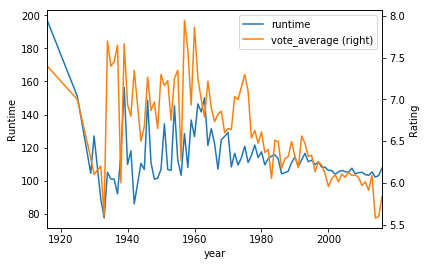

In [9]:
ax1=df_year[['runtime','vote_average']].plot(secondary_y='vote_average')
ax1.set_ylabel('Runtime')
ax1.right_ax.set_ylabel('Rating')
plt.show()

- Значения пар время/оценка после 1965 года коррелируют.

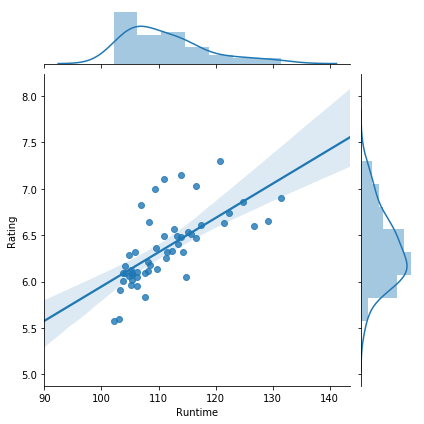

In [10]:
ax2=sns.jointplot(x='runtime', y='vote_average', data=df_year[df_year.index>=1965], kind='reg')
ax2.set_axis_labels('Runtime', 'Rating')
plt.show()

- Фильмы обычно чаще выходят в те месяцы, когда могут собрать больше кассу. Например, мы видим значительный подъём количества релизов в сентябре. Как раз, когда в большинстве стран начало учебного года, люди возвращаются из отпусков. Следующий подъём в декабре, когда выходят много фильмов с рождественской тематикой.

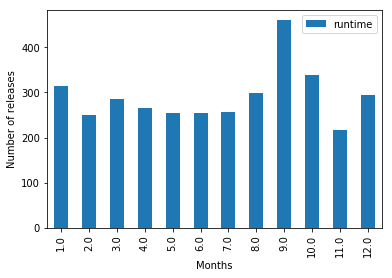

In [11]:
ax3=df[df['year']>=2000].groupby('month').count()[['runtime']].plot(kind='bar')
ax3.set_ylabel('Number of releases')
ax3.set_xlabel('Months')
plt.show()

- Самое интересное, что бюджеты фильмов, которые выходят в сентябе одни из самых низких. Самые высокобюджетные фильмы выходят с мая по июль и в конце года. Возможно, есть связь с Оскаром: с 2004 года номинанты объявляются в январе, а церемония проводится в феврале. До этого времени фильмы должны выйти в прокат.

In [12]:
df_mon=df.groupby('month').count()[['runtime']]
df_mon['av_budget']=df.groupby('month').mean()[['budget']]

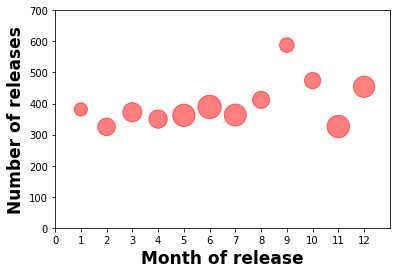

In [13]:
ax4=plt.scatter(df_mon.index, df_mon['runtime'], s=df_mon['av_budget']/80000,c="red",alpha=0.5)
plt.xlabel('Month of release', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('Number of releases', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.xlim(0,13)
plt.ylim(0,700)
plt.xticks(range(0,13,1))
plt.show()

__В целом,__ у этого датасета есть ограничения: из почти 5 тысяч записей почти 4 тысячи приходятся на фильмы американского производства.

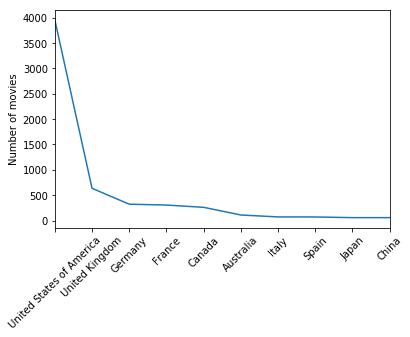

In [16]:
dfnona=df[df['production_countries'].notna()].reindex(range(0,len(df))).fillna('[]')
countries=[]
for x in range(0,len(df)):
    for y in range(0,len(ast.literal_eval(dfnona['production_countries'][x]))):
        countries.append(ast.literal_eval(dfnona['production_countries'][x])[y]['name'])
countries=pd.Series(countries)
countries.value_counts().head(10).plot(rot=45).set_ylabel('Number of movies')
plt.show()